In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
emails = pd.read_csv('../../data/emails.csv')
questions = pd.read_csv('../../data/questions.csv')
professionals = pd.read_csv('../../data/professionals.csv')
comments = pd.read_csv('../../data/comments.csv')
tag_users = pd.read_csv('../../data/tag_users.csv')
group_memberships = pd.read_csv('../../data/group_memberships.csv')
tags = pd.read_csv('../../data/tags.csv')
students = pd.read_csv('../../data/students.csv')
groups = pd.read_csv('../../data/groups.csv')
tag_questions = pd.read_csv('../../data/tag_questions.csv')
matches = pd.read_csv('../../data/matches.csv')
answers = pd.read_csv('../../data/answers.csv')
school_memberships = pd.read_csv('../../data/school_memberships.csv')

# Explaratory data analysis

In [3]:
answered_questions = pd.DataFrame(answers.answers_question_id.unique())
answered_questions.shape

(23110, 1)

In [4]:
questions.shape

(23931, 5)

In [5]:
(tag_questions.groupby('tag_questions_question_id').count().reset_index()
 .groupby('tag_questions_tag_id').count().reset_index().rename(
     columns={'tag_questions_question_id': 'number_of_questions',
              'tag_questions_tag_id': 'number_of_tags'
             })).head()

,number_of_tags,number_of_questions
0,1,5056
1,2,4652
2,3,4510
3,4,3524
4,5,2466


In [6]:
qa = questions.merge(answers, how='right', left_on='questions_id', right_on='answers_question_id')
qa.shape[0]

51123

In [7]:
# Maybe change this in the future by taking care of professional who change status to students and vise versa
temp = qa
temp = temp.merge(professionals, how='inner', left_on='answers_author_id', right_on='professionals_id')
print(temp.shape[0])
temp = temp.merge(students, how='inner', left_on='questions_author_id', right_on='students_id')
print(temp.shape[0])
qap = temp[[
    'questions_id', 'questions_title', 'questions_date_added', 'questions_body', 'answers_id',
    'answers_date_added', 'answers_body', 'professionals_id', 'professionals_location',
    'professionals_industry', 'professionals_headline', 'professionals_date_joined',
    'students_id', 'students_location', 'students_date_joined'
]]
qap.head(3)

50106
49723


,questions_id,questions_title,questions_date_added,questions_body,answers_id,answers_date_added,answers_body,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,students_id,students_location,students_date_joined
0,332a511f1569444485cf7a7a556a5e54,Teacher career question,2016-04-26 11:14:26 UTC+0000,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32 UTC+0000
1,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,2016-04-26 10:59:44 UTC+0000,Hi I am doing my 10th Standard. What are the q...,334f6735d31e45589e43da5ae7056e50,2018-03-08 18:23:36 UTC+0000,<p>It's helpful to take higher-level classes i...,05ab77d4c6a141b999044ebbf5415b0d,Greater New York City Area,Education Management,"AmeriCorps Urban Education Fellow, TutorCorps",2018-01-31 21:47:21 UTC+0000,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32 UTC+0000
2,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,2016-04-26 10:59:44 UTC+0000,Hi I am doing my 10th Standard. What are the q...,e5d66281cc314675b95ddbb799b75473,2018-03-08 18:24:03 UTC+0000,"<p>Essentially, treat them like human beings. ...",05ab77d4c6a141b999044ebbf5415b0d,Greater New York City Area,Education Management,"AmeriCorps Urban Education Fellow, TutorCorps",2018-01-31 21:47:21 UTC+0000,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32 UTC+0000


In [8]:
# Get tags for each question in lists
tag_groups_dict = tag_questions.groupby('tag_questions_question_id').groups

# Concatenate tag lists in single strings
for question, tags in tag_groups_dict.items():
    tag_list = list(tags)
    for i in range(len(tag_list)):
        tag_list[i] = str(tag_list[i])

    tag_groups_dict[question] = ','.join(tag_list)

# Create a DataFrame storing tags for questions in strings
tag_groups = pd.DataFrame.from_dict(tag_groups_dict, orient='index').reset_index()
tag_groups.rename({'index': 'questions_id', 0: 'questions_tags'}, axis=1, inplace=True)
tag_groups.head()

# Add question tags to qa_data
#qa_data = qa_data.merge(tag_groups, how='left', on='questions_id')

,questions_id,questions_tags
0,0003e7bf48f24b5c985f8fce96e611f3,"12839,23735,29372,48543,59166,59956"
1,0006609dd4da40dcaa5a83e0499aba14,"42995,43792"
2,000af224bc2f4e94a19f8b62ba279cc4,"7919,32359"
3,000b30fb534b41f7b716fa9ebf9c3f35,"5633,30173,34018,74570"
4,0018752e44b44e26bb74a0a43232b4d6,"21722,57042"


In [9]:
matches_groups_dict = matches.groupby('matches_email_id').groups

i = 0
for email, questions in matches_groups_dict.items():
    matches_groups_dict[email] = list(questions)
    
    if (i < 5):
        print(email, ':', list(questions))
    i += 1

106 : [3348214]
107 : [3348215]
108 : [3348216]
110 : [3348217]
277 : [1408486]


In [34]:
email_questions_dict = matches_groups_dict

In [35]:
counts = matches.groupby('matches_email_id').count()
counts.matches_question_id.value_counts().head()

3     986681
1     645047
2     126182
19     12320
4       5535
Name: matches_question_id, dtype: int64

In [36]:
number_answered = qap[['questions_id', 'professionals_id']].groupby('professionals_id').count()
number_answered[number_answered.questions_id > 100].head()

,questions_id
professionals_id,
05ab77d4c6a141b999044ebbf5415b0d,611
0b17f4e9d93c40eb9a5d087865084ce6,127
369f1c8646b649f6997eae7809696bd5,401
36ff3b3666df400f956f8335cf53e09e,1703
3ab86281ac254f53b12fbe039856c5dd,104


In [37]:
prof_emails_received = pd.merge(professionals, emails, how='inner', left_on='professionals_id', right_on='emails_recipient_id')
prof_emails_received.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily


In [38]:
prof_emails_received.shape

(1850101, 9)

In [39]:
prof_emails = prof_emails_received[['professionals_id', 'emails_id', 'emails_frequency_level', 'emails_date_sent']]
prof_emails.head()

,professionals_id,emails_id,emails_frequency_level,emails_date_sent
0,0c673e046d824ec0ad0ebe012a0673e4,2337714,email_notification_daily,2018-12-07 01:05:40 UTC+0000
1,0c673e046d824ec0ad0ebe012a0673e4,2336077,email_notification_daily,2018-12-06 01:14:15 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,2314660,email_notification_daily,2018-11-17 00:38:27 UTC+0000
3,0c673e046d824ec0ad0ebe012a0673e4,2312639,email_notification_daily,2018-11-16 00:32:19 UTC+0000
4,0c673e046d824ec0ad0ebe012a0673e4,2299700,email_notification_daily,2018-11-08 00:16:40 UTC+0000


In [40]:
prof_email_questions = prof_emails.merge(
    matches, how='inner', left_on='emails_id', right_on='matches_email_id')
prof_email_questions.shape

(4316275, 6)

In [41]:
prof_answered_questions = qap[['professionals_id', 'questions_id', 'questions_date_added', 'answers_date_added']]
prof_answered_questions.shape

(49723, 4)

In [42]:
questions_answered_from_emails = pd.merge(
    prof_email_questions, prof_answered_questions, how='inner',
    left_on=['professionals_id', 'matches_question_id'],
    right_on=['professionals_id', 'questions_id'])
questions_answered_from_emails = questions_answered_from_emails[[
    'emails_id', 'emails_frequency_level', 'questions_id',
    'questions_date_added', 'emails_date_sent', 'answers_date_added'
]]
questions_answered_from_emails.shape

(17518, 6)

In [43]:
questions_answered_from_emails.head()

,emails_id,emails_frequency_level,questions_id,questions_date_added,emails_date_sent,answers_date_added
0,1394664,email_notification_daily,5cb6040f85d34c03a95f27244bc40e29,2017-09-29 12:45:43 UTC+0000,2017-09-30 04:16:01 UTC+0000,2017-09-30 15:35:03 UTC+0000
1,560470,email_notification_daily,2c7bb1973510493aa8daf75e08bbe773,2016-05-25 17:49:15 UTC+0000,2016-05-25 23:26:05 UTC+0000,2016-05-27 22:41:28 UTC+0000
2,919741,email_notification_daily,0803ed6276ae43eb80fd1a2e2386a526,2016-10-31 21:43:59 UTC+0000,2016-11-07 23:09:02 UTC+0000,2016-11-08 00:47:24 UTC+0000
3,916502,email_notification_daily,384c809662f348daa8a8019f7a10ded4,2016-10-31 04:49:58 UTC+0000,2016-11-05 23:45:31 UTC+0000,2016-11-06 16:18:33 UTC+0000
4,883636,email_notification_daily,c4e51d0e3e9440d6b4bec6a352426c30,2016-05-16 21:52:09 UTC+0000,2016-10-26 23:18:27 UTC+0000,2016-10-26 23:20:25 UTC+0000


In [44]:
questions_answered_from_emails.questions_id.unique().shape

(10418,)

In [45]:
count = questions_answered_from_emails.groupby('questions_id').count().emails_id == 1
count.mean()

0.5653676329429833

In [46]:
questions_answered_from_emails.groupby('emails_frequency_level').count().emails_id

emails_frequency_level
email_notification_daily        12512
email_notification_immediate     4464
email_notification_weekly         542
Name: emails_id, dtype: int64

In [203]:
prof_id = '369f1c8646b649f6997eae7809696bd5'

In [204]:
particular_prof_emails = prof_emails_received[prof_emails_received.professionals_id == prof_id]

In [205]:
particular_prof_emails.shape

(930, 9)

In [206]:
particular_prof_emails = particular_prof_emails[['professionals_date_joined', 'emails_id',
                                                 'emails_frequency_level', 'emails_date_sent']]
particular_prof_emails.shape

(930, 4)

In [208]:
particular_prof_email_questions = particular_prof_emails.merge(
    matches, how='inner', left_on='emails_id', right_on='matches_email_id')
particular_prof_email_questions.shape

(2160, 6)

In [210]:
particular_prof_answered_questions = qap[qap.professionals_id == prof_id]
particular_prof_answered_questions = particular_prof_answered_questions[['questions_id', 'questions_date_added',
                                                                         'answers_date_added']]

In [211]:
particular_prof_answered_questions.shape

(406, 3)

In [212]:
questions_answered_from_emails = pd.merge(
    particular_prof_email_questions, particular_prof_answered_questions,
    how='inner', left_on='matches_question_id', right_on='questions_id')
questions_answered_from_emails = questions_answered_from_emails[[
    'professionals_date_joined', 'emails_id', 'emails_frequency_level', 'emails_date_sent',
    'questions_id', 'questions_date_added', 'answers_date_added'
]]
questions_answered_from_emails.shape

(61, 7)

In [126]:
questions_answered_from_emails

,professionals_date_joined,emails_id,emails_frequency_level,emails_date_sent,questions_id,questions_date_added,answers_date_added
0,2016-02-11 16:55:00 UTC+0000,2386630,email_notification_daily,2019-01-15 23:38:53 UTC+0000,860c51aed7af432aa7373c7ec2d02b2b,2019-01-15 17:21:36 UTC+0000,2019-01-16 22:57:58 UTC+0000
1,2016-02-11 16:55:00 UTC+0000,2373461,email_notification_daily,2019-01-08 23:47:30 UTC+0000,06a91965b5b341b59d4fafc85a33a1e9,2019-01-08 20:53:23 UTC+0000,2019-01-09 16:07:25 UTC+0000
2,2016-02-11 16:55:00 UTC+0000,2295239,email_notification_daily,2018-11-05 23:14:49 UTC+0000,ed0618f56a48433b91250cfc5979197b,2018-11-05 14:54:28 UTC+0000,2018-11-06 03:05:58 UTC+0000
3,2016-02-11 16:55:00 UTC+0000,2143070,email_notification_daily,2018-09-01 03:55:09 UTC+0000,9ea7db44db3343e7a9878b65a4762a3a,2018-08-30 17:10:37 UTC+0000,2018-09-02 21:24:30 UTC+0000
4,2016-02-11 16:55:00 UTC+0000,2122246,email_notification_daily,2018-08-21 23:04:47 UTC+0000,70a6ecdcf0af453ebd31046a6f07b509,2018-08-14 16:09:40 UTC+0000,2018-08-22 22:56:05 UTC+0000
5,2016-02-11 16:55:00 UTC+0000,2122246,email_notification_daily,2018-08-21 23:04:47 UTC+0000,ea812cadcbe14368bef1cba85a737a6e,2018-08-21 01:16:39 UTC+0000,2018-08-22 22:53:02 UTC+0000
6,2016-02-11 16:55:00 UTC+0000,2084019,email_notification_daily,2018-08-08 00:58:14 UTC+0000,2ed5ca5dc78e4269be3afe2133e30cfc,2018-08-07 16:48:57 UTC+0000,2018-08-08 22:20:01 UTC+0000
7,2016-02-11 16:55:00 UTC+0000,1965985,email_notification_daily,2018-06-16 00:13:19 UTC+0000,9791eb2a460d44c2bd17e985f3866641,2018-01-16 19:22:19 UTC+0000,2018-06-17 21:19:35 UTC+0000
8,2016-02-11 16:55:00 UTC+0000,1965985,email_notification_daily,2018-06-16 00:13:19 UTC+0000,3a042fcd3df74035acfd4e7d21e2ef6a,2018-06-15 01:40:41 UTC+0000,2018-06-17 20:55:33 UTC+0000
9,2016-02-11 16:55:00 UTC+0000,1906919,email_notification_daily,2018-05-24 23:00:15 UTC+0000,886e778c9f9f41f3b06426e1f719f80d,2018-01-12 03:42:23 UTC+0000,2018-05-24 23:15:49 UTC+0000


In [54]:
num_ans_loc = number_answered.merge(
    professionals[['professionals_id', 'professionals_location']],
    how='left', left_index=True, right_on='professionals_id')[['questions_id', 'professionals_location']]
num_ans_loc.rename({'questions_id': 'number_answered'}, axis=1, inplace=True)
num_ans_loc.head()

,number_answered,professionals_location
4590,3,"New York, New York"
5460,3,"Nashville, Tennessee"
23089,24,"San Antonio, Texas Area"
13761,4,"Boston, Massachusetts"
11303,5,"Woodbridge Township, New Jersey"


In [97]:
all_data = qap

In [99]:
# Transform all dates from string representation to python datetime object
# and add question_time_to_answer feature
all_data.answers_date_added = pd.to_datetime(all_data.answers_date_added)
all_data.questions_date_added = pd.to_datetime(all_data.questions_date_added)
all_data['questions_age'] = all_data.answers_date_added - all_data.questions_date_added

In [106]:
number_answered = all_data[['questions_id', 'professionals_id']].groupby('professionals_id').count()
number_answered = number_answered.rename({'questions_id': 'professionals_questions_answered'}, axis=1)
number_answered.head()

,professionals_questions_answered
professionals_id,
00009a0f9bda43eba47104e9ac62aff5,3
000d4635e5da41e3bfd83677ee11dda4,3
00271cc10e0245fba4a35e76e669c281,24
003cc21be89d4e42bc4424131a378e86,4
0046ab8089c04b3a8df3f8c28621a818,5


In [118]:
active_professionals = pd.DataFrame({'professionals_id': all_data.professionals_id.unique()})
active_professionals.head()

,professionals_id
0,36ff3b3666df400f956f8335cf53e09e
1,05ab77d4c6a141b999044ebbf5415b0d
2,58fa5e95fe9e480a9349bbb1d7faaddb
3,97556cfd2ee14bada22d55cf172c299e
4,dfbfda742bee4f5b8df7024c66cf77b4


In [119]:
prof_data = professionals.merge(active_professionals, how='right', on='professionals_id')
prof_data.professionals_date_joined = pd.to_datetime(prof_data.professionals_date_joined)

In [120]:
prof_data = prof_data.merge(number_answered, left_on='professionals_id', right_index=True)

In [121]:
prof_data.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professionals_questions_answered
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34
1,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29,23
2,c9bfa93898594cbbace436deca644c64,NaN,NaN,NaN,2011-12-12 14:25:46,1
3,5a4a16842ec64430ac3f916aacf35fe1,NaN,NaN,NaN,2011-12-26 05:00:00,1
4,81999d5ad93549dab55636a545e84f2a,NaN,NaN,NaN,2011-12-26 05:00:00,3


In [93]:
average_question_age = (
    all_data.groupby('professionals_id')
    .questions_age.mean(numeric_only=False)
)

In [94]:
average_question_age = pd.DataFrame({'professionals_average_question_age': average_question_age})
average_question_age.head()

,professionals_average_question_age
professionals_id,
00009a0f9bda43eba47104e9ac62aff5,283 days 02:55:40.666666
000d4635e5da41e3bfd83677ee11dda4,133 days 03:54:34.666666
00271cc10e0245fba4a35e76e669c281,218 days 05:22:24.458333
003cc21be89d4e42bc4424131a378e86,398 days 22:50:44
0046ab8089c04b3a8df3f8c28621a818,117 days 19:17:26


In [113]:
prof_data = prof_data.merge(average_question_age, on='professionals_id')
prof_data.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professionals_questions_answered,professionals_average_question_age
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
1,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
3,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
4,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705


In [140]:
# Now the same for students
active_students = pd.DataFrame({'students_id': all_data.students_id.unique()})
active_students.head()

,students_id
0,8f6f374ffd834d258ab69d376dd998f5
1,585ac233015447cc9e9a217044e515e1
2,34217a1861d640a58c85e033414cf9cb
3,5b751a8ee4a047f7a08ce9eb5e43e5a2
4,2fe767de78fa4dfd83f0021cf7712064


In [141]:
number_asked = all_data[['questions_id', 'students_id']].groupby('students_id').count()
number_asked = number_asked.rename({'questions_id': 'students_questions_asked'}, axis=1)
number_asked.head()

,students_questions_asked
students_id,
0001a66883f74e8d91884fc6ea0d66a7,4
0004592176864233990d949862baa2f3,2
001bd6f7f1ac4897b0b35dc665c64d2e,7
001d1629d09d441a8f09e3bfa884e6b9,2
001df2a2cfb74ef78f3053ddee305ba6,4


In [142]:
stud_data = students.merge(active_students, how='right', on='students_id')
stud_data.students_date_joined = pd.to_datetime(stud_data.students_date_joined)
stud_data.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,5bdd2eb44dd944a9a7ab9aba068d1ef2,NaN,2012-01-01 05:00:00
2,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00
3,7b1900c458e34573bfeb0d57ffbd260a,NaN,2012-01-01 05:00:00
4,e9efc4d6e06e49c7ae5afe1aad8c5bd5,NaN,2012-01-01 05:00:00


In [143]:
stud_data = stud_data.merge(number_asked, left_on='students_id', right_index=True)
stud_data.head()

,students_id,students_location,students_date_joined,students_questions_asked
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24,2
1,5bdd2eb44dd944a9a7ab9aba068d1ef2,NaN,2012-01-01 05:00:00,2
2,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00,6
3,7b1900c458e34573bfeb0d57ffbd260a,NaN,2012-01-01 05:00:00,3
4,e9efc4d6e06e49c7ae5afe1aad8c5bd5,NaN,2012-01-01 05:00:00,1


In [144]:
average_question_age = (
    all_data.groupby('students_id')
    .questions_age.mean(numeric_only=False)
)

In [145]:
average_question_age = pd.DataFrame({'students_average_question_age': average_question_age})
average_question_age.head()

,students_average_question_age
students_id,
0001a66883f74e8d91884fc6ea0d66a7,9 days 15:59:08
0004592176864233990d949862baa2f3,218 days 05:37:10.500000
001bd6f7f1ac4897b0b35dc665c64d2e,43 days 09:56:39.571428
001d1629d09d441a8f09e3bfa884e6b9,45 days 09:36:57
001df2a2cfb74ef78f3053ddee305ba6,214 days 14:00:50.750000


In [146]:
stud_data = stud_data.merge(average_question_age, on='students_id')
stud_data.head()

,students_id,students_location,students_date_joined,students_questions_asked,students_average_question_age
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24,2,794 days 06:00:53
1,5bdd2eb44dd944a9a7ab9aba068d1ef2,NaN,2012-01-01 05:00:00,2,2 days 16:05:06.500000
2,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00,6,377 days 15:36:03
3,7b1900c458e34573bfeb0d57ffbd260a,NaN,2012-01-01 05:00:00,3,8 days 13:05:38
4,e9efc4d6e06e49c7ae5afe1aad8c5bd5,NaN,2012-01-01 05:00:00,1,21 days 21:56:35


In [3]:
qa_data = pd.read_csv('../../data/qa_data.csv')
stud_data = pd.read_csv('../../data/stud_data.csv')
prof_data = pd.read_csv('../../data/prof_data.csv')

In [89]:
qa_data.questions_date_added = pd.to_datetime(qa_data.questions_date_added)

In [91]:
qa_data.questions_date_added.loc[0].dayofyear

117

In [213]:
ques_by_loc = stud_data.groupby('students_state').students_questions_asked.sum().sort_values(ascending=False)

In [222]:
ques_by_loc.iloc[40:].head()

students_state
Spain          144
Mississippi    135
Nebraska       128
New Mexico     109
Vermont        100
Name: students_questions_asked, dtype: int64

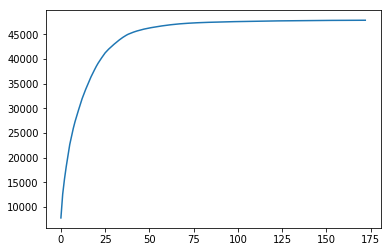

In [215]:
plt.plot(ques_by_loc.values.cumsum());

In [221]:
ques_by_loc.values.cumsum()[40]

45300

In [223]:
ques_by_loc = prof_data.groupby('professionals_state').professionals_questions_answered.sum().sort_values(ascending=False)

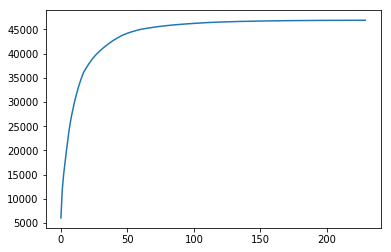

In [224]:
plt.plot(ques_by_loc.values.cumsum());

In [236]:
ques_by_loc.values.cumsum()[40]

42847

In [240]:
ques_by_loc.iloc[40:].head()

professionals_state
Minnesota                     172
Wisconsin                     165
Washington D.C. Metro Area    160
South Carolina                160
Missouri                      154
Name: professionals_questions_answered, dtype: int64

In [241]:
ques_by_loc = prof_data.groupby('professionals_industry').professionals_questions_answered.sum().sort_values(ascending=False)

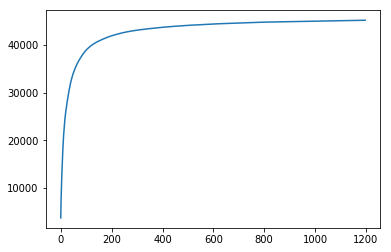

In [242]:
plt.plot(ques_by_loc.values.cumsum());

In [254]:
ques_by_loc.values.cumsum()[100]

38934

In [4]:
qa_data.head()

,students_id,questions_id,questions_title,questions_body,questions_date_added,professionals_id,answers_id,answers_body,professionals_last_answer_date
0,8f6f374ffd834d258ab69d376dd998f5,332a511f1569444485cf7a7a556a5e54,Teacher career question,What is a maths teacher? what is a ma...,2016-04-26 11:14:26,36ff3b3666df400f956f8335cf53e09e,4e5f01128cae4f6d8fd697cec5dca60c,<p>Hi!</p>\r\n<p>You are asking a very interes...,2016-04-29 14:15:00
1,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,334f6735d31e45589e43da5ae7056e50,<p>It's helpful to take higher-level classes i...,2018-03-08 18:23:01
2,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,e5d66281cc314675b95ddbb799b75473,"<p>Essentially, treat them like human beings. ...",2018-03-08 18:23:36
3,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,2016-04-26 10:59:44,58fa5e95fe9e480a9349bbb1d7faaddb,e5c0da2a29ff414fa76b9da6e86337fc,<p>Check the link below.</p>\r\n<p>http://www....,2016-07-03 18:09:58
4,585ac233015447cc9e9a217044e515e1,0f1d6a4f276c4a05878dd48e03e52289,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,2016-05-19 22:16:25,36ff3b3666df400f956f8335cf53e09e,f3519ab99a1a4a13a8a9ecb814287d2a,<p>Hi Rodrigo!</p>\r\n<p>The important thing t...,2016-07-31 15:10:27


In [5]:
qa_data.columns

Index(['students_id', 'questions_id', 'questions_title', 'questions_body',
       'questions_date_added', 'professionals_id', 'answers_id',
       'answers_body', 'professionals_last_answer_date'],
      dtype='object')

In [22]:
qa_data.filter(regex=r'^(questions|students)', axis=1)

,students_id,questions_id,questions_title,questions_body,questions_date_added
0,8f6f374ffd834d258ab69d376dd998f5,332a511f1569444485cf7a7a556a5e54,Teacher career question,What is a maths teacher? what is a ma...,2016-04-26 11:14:26
1,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,2016-04-26 10:59:44
2,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,2016-04-26 10:59:44
3,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,2016-04-26 10:59:44
4,585ac233015447cc9e9a217044e515e1,0f1d6a4f276c4a05878dd48e03e52289,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,2016-05-19 22:16:25
5,585ac233015447cc9e9a217044e515e1,c2d79c48f7f94126ab8f258cba7f40cc,How much does it cost to go to college?,i want to go to college so i could get a good...,2016-05-19 22:31:53
6,585ac233015447cc9e9a217044e515e1,c2d79c48f7f94126ab8f258cba7f40cc,How much does it cost to go to college?,i want to go to college so i could get a good...,2016-05-19 22:31:53
7,34217a1861d640a58c85e033414cf9cb,0149c6d63e214040b44d4a3789bb00ba,What is the best way to prepare for studying e...,"I am interested in Computational Neuroscience,...",2018-04-12 17:13:45
8,34217a1861d640a58c85e033414cf9cb,0149c6d63e214040b44d4a3789bb00ba,What is the best way to prepare for studying e...,"I am interested in Computational Neuroscience,...",2018-04-12 17:13:45
9,34217a1861d640a58c85e033414cf9cb,b33345a38b1f4baa8de2228839683197,What is the best way to teach yourself how to ...,I need to learn more about computer science an...,2018-04-12 17:15:52


In [13]:
%lprun -f qa_data.filter qa_data.filter(like="questions", axis=1)

In [8]:
%load_ext line_profiler

In [23]:
import json

In [30]:
with open('cat_features.json', 'w') as f:
    json.dump(
        {
            'n_cats': {
                'ques': {
                    'students_location': 100,
                    'students_state': 40,
                    'list': [102, 42]
                },
                'prof': {
                    'professionals_industry': 100,
                    'professionals_location': 100,
                    'professionals_state': 40,
                    'list': [102, 102, 42]
                }
            },
            'emb_size': {
                'ques': [],
                'prof': []
            }
        }, f, indent=2)